In [1]:

# Proyecto primer bimestre
## Kevin Mendoza

## INTRODUCCION
### El presente proyecto de analisis de datos con python trata sobre lo siguiente,
### Se obtuvo un archivo csv que contiene datos de hombres en donde se puede
### encontrar su fecha de nacimiento, provncia y canton donde nacio, su edad,
### su estado civil, la cantidad de hijos que tiene esta persona, esos son los
### campos principales que se usaran, pero este archivo contienen mas campos.

## DESARROLLO
###Para realizar este proyecto se usaran las siguientes librerías.

import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt

In [2]:
###El archivo csv se encuentra en la siguiente direccion, este se lo guardara
###en el siguiente path.
path = "D://kevin//poli//actualizacion//python//proyecto//proyecto.csv"

In [3]:

###Al dataframe de prueba se lo usara de la siguiente manera.
df_prueba = pd.read_csv(path,  encoding = 'unicode_escape',sep = ";")

In [4]:
###Como se explico anteriormente en la introduccion, se usaran los siguientes
###campos.
columnas = ['prov_insc','cant_insc','hijos_rec',
            'anio_nach','mes_nach','dia_nach',
            'edad_hom','est_civih']

In [5]:
###Se tendra un nuevo dataframe que usara las columnas definidas anteriormente.
df_prueba2 = pd.read_csv(path,  encoding = 'unicode_escape',sep = ";", usecols=columnas)

In [6]:
###Para continuar se guardara en un pickle, con la siguiente configuracion.
path_guardado_pickle = "D://kevin//poli//actualizacion//python//proyecto//proyecto.pickle"

In [7]:
df_prueba2.to_pickle(path_guardado_pickle)

df_pickle = pd.read_pickle(path_guardado_pickle)

df = df_pickle.iloc[1:1000,:].copy()

In [8]:
###y para finalizar y poder realizar el analisis se creara el xlsx del proyecto.
df.to_excel('D://kevin//poli//actualizacion//python//proyecto//mi_proyecto.xlsx')

In [9]:
###Para poder ver lo que contiene nuestro dataframe y poder continuar con el
###analiis, usaremos la siguiente linea.
df.head()

,prov_insc,cant_insc,hijos_rec,anio_nach,mes_nach,dia_nach,edad_hom,est_civih
1,Bolívar,Guaranda,2,1983,Septiembre,25,33,Soltero
2,Bolívar,Caluma,3,1983,Marzo,2,33,Soltero
3,Bolívar,Caluma,2,1982,Octubre,30,34,Soltero
4,Manabí,Montecristi,0,1957,Septiembre,18,59,Viudo
5,Santa Elena,Salinas,1,1990,Julio,4,26,Divorciado


In [10]:
###Para poder observar en una tabla varios ejemplos se lo realiza de la 
###siguiente manera; por ejemplo: hombres con estado civil viudos
df[df.est_civih=='Viudo']

,prov_insc,cant_insc,hijos_rec,anio_nach,mes_nach,dia_nach,edad_hom,est_civih
4,Manabí,Montecristi,0,1957,Septiembre,18,59,Viudo
85,Chimborazo,Cumandá,0,1978,Noviembre,13,38,Viudo
202,Guayas,Guayaquil,0,1965,Marzo,8,52,Viudo
255,Guayas,Guayaquil,0,1944,Noviembre,7,72,Viudo
340,Carchi,Tulcán,0,1957,Mayo,14,60,Viudo
357,Esmeraldas,Esmeraldas,3,1937,Agosto,4,79,Viudo
420,Santo Domingo de los Tsáchilas,Santo Domingo,0,1954,Julio,1,62,Viudo
436,Galápagos,San Cristóbal,1,1976,Junio,17,41,Viudo
437,Los Ríos,Quevedo,3,1945,Abril,20,71,Viudo
468,Pichincha,Quito,2,1963,Junio,30,53,Viudo


In [11]:
### Hombres con mas de tres hijos
df[df.hijos_rec > 3]

,prov_insc,cant_insc,hijos_rec,anio_nach,mes_nach,dia_nach,edad_hom,est_civih
144,Guayas,Guayaquil,5,1954,Octubre,19,62,Soltero
157,Guayas,Milagro,4,1958,Noviembre,16,58,Soltero
180,Guayas,Balzar,5,1984,Diciembre,18,32,Soltero
187,Guayas,Guayaquil,4,1969,Mayo,27,47,Soltero
234,Guayas,Milagro,99,1932,Julio,12,84,Divorciado
265,Manabí,Manta,4,1978,Noviembre,6,38,Soltero
326,Pichincha,Quito,4,1955,Abril,11,61,Soltero
364,Esmeraldas,Atacames,4,1983,Mayo,5,34,Soltero
367,Manabí,Pedernales,99,1987,Agosto,20,29,Soltero
391,Manabí,Manta,4,1975,Mayo,6,41,Soltero


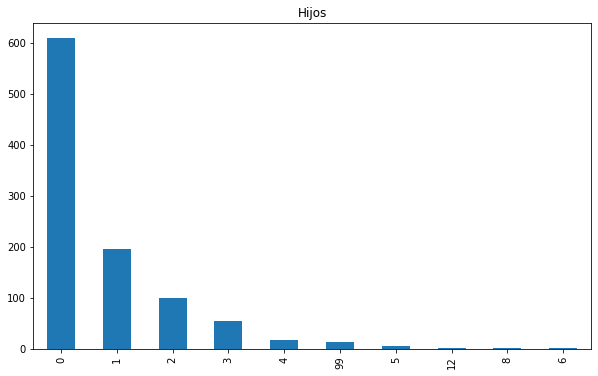

In [12]:
##Graficos
###grafico hijos
###El siguiente grafico se puede observar la cantidad de pesonas que no tienen
###hijos o que tienen 1 hijo, 2 hijo, etc.
fig = plt.figure(figsize=(10,6))

df.hijos_rec.value_counts().plot(kind='bar')
plt.title('Hijos')

plt.show()

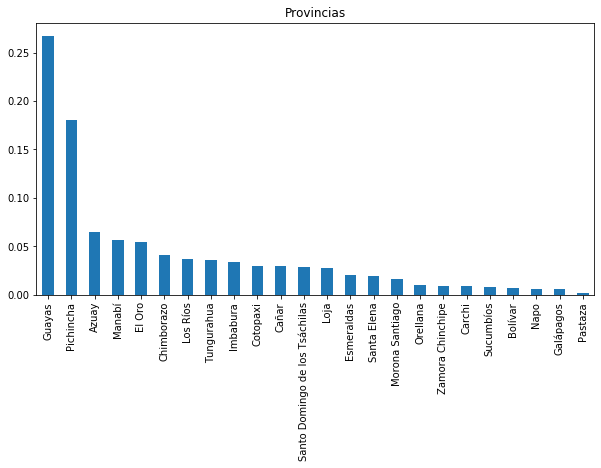

In [13]:
###Grafico provincias
###El siguiente grafico se observar el numero de hombres que hay en cada provincia

fig = plt.figure(figsize=(10,5))

df.prov_insc.value_counts(normalize = True).plot(kind='bar')
plt.title('Provincias')

plt.show()

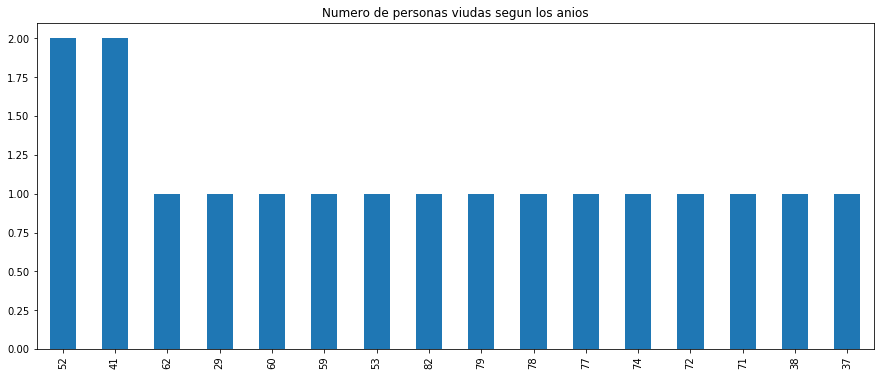

In [14]:
###Grafico viudos segun los anios
###En el siguiente grafico se puede ver el numero de hombres viudos segun los anios

fig = plt.figure(figsize=(15,6))

df.edad_hom[df.est_civih=='Viudo'].value_counts().plot(kind='bar')
plt.title('Numero de personas viudas segun los anios')

plt.show()


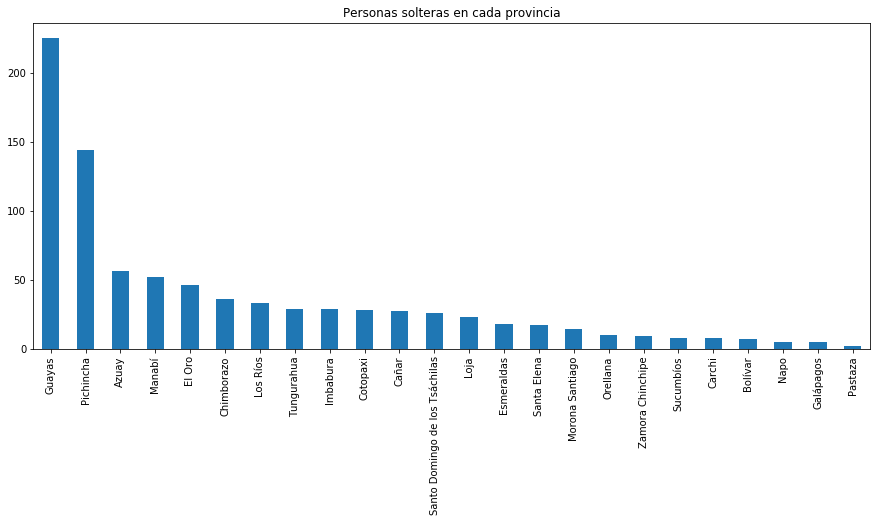

In [15]:
###Grafico solteras en cada provincia
###El siguiente grafico muestra el numero de solteros en cada provincia
fig = plt.figure(figsize=(15,6))

df.prov_insc[df.est_civih=='Soltero'].value_counts().plot(kind='bar')
plt.title('Personas solteras en cada provincia')

plt.show()

C:\Users\kevme\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


<Figure size 1080x432 with 0 Axes>

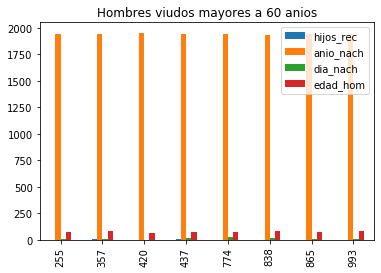

In [16]:
###Hombres viudos maypres a 60 anios
###El grafico a continuacion muestra a hombres viudos maypres a 60 anios
## tabla hombres mayores a 60 anios
mayores_60_anios = df[df.edad_hom > 60]
mayores_60_anios

fig = plt.figure(figsize=(15,6))

mayores_60_anios[df.est_civih=='Viudo'].plot(kind='bar')
plt.title('Hombres viudos mayores a 60 anios')

plt.show()

C:\Users\kevme\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


<Figure size 1080x432 with 0 Axes>

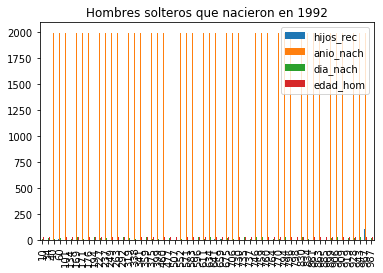

Text(0, 0.5, 'Total de hombres')

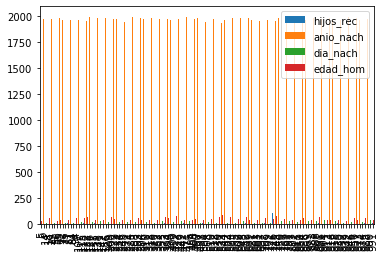

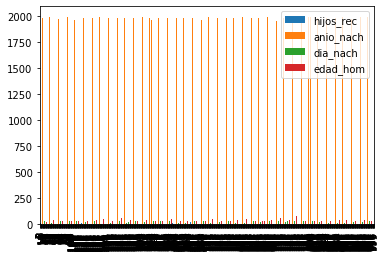

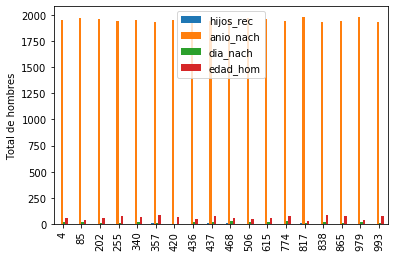

In [17]:

### Hombres solteros que nacieron en 1992
###El grafico a continuacion muestra a hombres solteros que nacieron en 1992
## tabla hombres mayores a 60 anios
anio_nacimiento = df[df.anio_nach == 1992]
anio_nacimiento

fig = plt.figure(figsize=(15,6))

anio_nacimiento[df.est_civih=='Soltero'].plot(kind='bar')
plt.title('Hombres solteros que nacieron en 1992')

plt.show()


df.groupby('est_civih').plot(kind = 'bar')
plt.ylabel('Total de hombres')

In [18]:
##Conclusiones

#1) Como se pudo observar en la practica python es una herramienta muy poderosa
#que nos ayuda en el analisis de datos.

#2) Python nos permite separar los datos si un archivo es muy grande de la
#siguiente manera df = df_pickle.iloc[1:1000,:].copy() para que de esta forma
#sea mas facil el trabajo.

#3) Los graficos que nos ofrece python nos ayuda a visualizar de una manera mas 
#dinamica los datos que se tengan en los archivos.